In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
df = pd.read_csv("Customer_Actions.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [117]:
print("Size of the dataset : ", df.shape)

Size of the dataset :  (350, 5)


#### 1. Age vs Purchasing behaviour

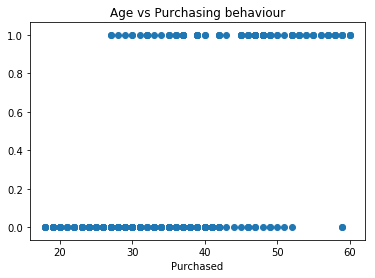

In [119]:
plt.scatter(df["Age"], df["Purchased"])
plt.title("Age vs Purchasing behaviour")
plt.xlabel("Age")
plt.xlabel("Purchased")
plt.show()

In [120]:
from sklearn.preprocessing import LabelEncoder

In [123]:
label_encoder = LabelEncoder()
df["Gender_encoded"] = label_encoder.fit_transform(df["Gender"])

In [124]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [125]:
X = df[["Gender_encoded", "Age", "EstimatedSalary"]]
y = df["Purchased"]

####  Train-test Split

In [126]:
from sklearn.model_selection import train_test_split

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [160]:
print("Size of training data : ", X_train.shape[0])
print("Size of test data : ", X_test.shape[0])

Size of training data :  262
Size of test data :  88


#### Normalization

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [213]:
min_max = MinMaxScaler()
min_max.fit(X_train[["Age", "EstimatedSalary"]])
train_transformed = min_max.transform(X_train[["Age", "EstimatedSalary"]])
test_transformed = min_max.transform(X_test[["Age", "EstimatedSalary"]])
test_transformed

array([[0.21428571, 0.51111111],
       [0.26190476, 0.5037037 ],
       [0.5952381 , 0.87407407],
       [0.11904762, 0.03703704],
       [0.57142857, 0.42962963],
       [0.23809524, 0.12592593],
       [0.02380952, 0.08148148],
       [0.4047619 , 0.44444444],
       [0.0952381 , 0.48888889],
       [0.61904762, 0.17777778],
       [0.71428571, 0.77037037],
       [0.0952381 , 0.35555556],
       [0.45238095, 0.28148148],
       [0.28571429, 0.53333333],
       [0.19047619, 0.        ],
       [0.04761905, 0.4962963 ],
       [0.07142857, 0.39259259],
       [0.42857143, 0.33333333],
       [0.66666667, 0.6       ],
       [0.52380952, 0.31111111],
       [0.54761905, 0.27407407],
       [0.76190476, 0.15555556],
       [0.28571429, 0.25185185],
       [0.35714286, 0.99259259],
       [0.19047619, 0.        ],
       [0.73809524, 0.0962963 ],
       [0.26190476, 0.48148148],
       [0.4047619 , 0.25925926],
       [0.        , 0.27407407],
       [0.11904762, 0.0962963 ],
       [0.

In [214]:
X_train["Age_normalized"] = train_transformed[:,0]
X_train["EstimatedSalary_normalized"] = train_transformed[:,1]
X_train.head()

,Gender_encoded,Age,EstimatedSalary,Age_normalized,EstimatedSalary_normalized
66,1,24,19000,0.142857,0.029630
126,1,42,65000,0.571429,0.370370
12,1,20,86000,0.047619,0.525926
221,1,35,91000,0.404762,0.562963
316,0,54,104000,0.857143,0.659259


In [215]:
X_test["Age_normalized"] = test_transformed[:,0]
X_test["EstimatedSalary_normalized"] = test_transformed[:,1]
X_test.head()

,Gender_encoded,Age,EstimatedSalary,Age_normalized,EstimatedSalary_normalized
6,0,27,84000,0.214286,0.511111
52,0,29,83000,0.261905,0.503704
270,0,43,133000,0.595238,0.874074
45,1,23,20000,0.119048,0.037037
296,1,42,73000,0.571429,0.429630


### Fitting Logistic Regression models

#### Model 1 - Using Age only

In [135]:
from sklearn.linear_model import LogisticRegression

In [216]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train[["Age_normalized"]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [217]:
predictions = logistic_model.predict(X_test[["Age_normalized"]])
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score

In [218]:
print("Test data Accuracy :", logistic_model.score(X_test[["Age_normalized"]], y_test))

Test data Accuracy : 0.8295454545454546


In [219]:
train_predictions = logistic_model.predict(X_train[["Age_normalized"]])
print("Training data Accuracy : ", logistic_model.score(X_train[["Age_normalized"]], y_train))

Training data Accuracy :  0.8282442748091603


#### Model 2 - Using all normalized and encoded features 

In [220]:
logistic_model2 = LogisticRegression()
logistic_model2.fit(X_train[["Gender_encoded", "Age_normalized", "EstimatedSalary_normalized"]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [221]:
predictions = logistic_model2.predict(X_test[["Gender_encoded", "Age_normalized", "EstimatedSalary_normalized"]])
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [222]:
print("Test data Accuracy : ",accuracy_score(y_test, predictions))

Test data Accuracy :  0.8409090909090909


In [223]:
train_predictions = logistic_model2.predict(X_train[["Gender_encoded", "Age_normalized", "EstimatedSalary_normalized"]])
print("Training data Accuracy : ",accuracy_score(y_train, train_predictions))

Training data Accuracy :  0.8549618320610687


#### Getting the probabilites

In [236]:
X_test[["Gender_encoded", "Age_normalized", "EstimatedSalary_normalized"]].iloc[0, :]

Gender_encoded                0.000000
Age_normalized                0.214286
EstimatedSalary_normalized    0.511111
Name: 6, dtype: float64

In [235]:
logistic_model2.predict_proba(X_test[["Gender_encoded", "Age_normalized", "EstimatedSalary_normalized"]].iloc[0, :].values.reshape(1,-1))

array([[0.83872664, 0.16127336]])

In [240]:
pred_probs = logistic_model2.predict_proba(X_test[["Gender_encoded", "Age_normalized", "EstimatedSalary_normalized"]])
pred_probs

array([[0.83872664, 0.16127336],
       [0.81245368, 0.18754632],
       [0.24197868, 0.75802132],
       [0.97502973, 0.02497027],
       [0.61581155, 0.38418845],
       [0.94633917, 0.05366083],
       [0.97864689, 0.02135311],
       [0.75885279, 0.24114721],
       [0.91261066, 0.08738934],
       [0.7203495 , 0.2796505 ],
       [0.20904681, 0.79095319],
       [0.93422229, 0.06577771],
       [0.81048239, 0.18951761],
       [0.799286  , 0.200714  ],
       [0.96988747, 0.03011253],
       [0.91808548, 0.08191452],
       [0.93338676, 0.06661324],
       [0.80107261, 0.19892739],
       [0.35697842, 0.64302158],
       [0.7409322 , 0.2590678 ],
       [0.74351836, 0.25648164],
       [0.59819337, 0.40180663],
       [0.90615763, 0.09384237],
       [0.38118745, 0.61881255],
       [0.96643616, 0.03356384],
       [0.68987213, 0.31012787],
       [0.83862518, 0.16137482],
       [0.84930192, 0.15069808],
       [0.96875132, 0.03124868],
       [0.96663243, 0.03336757],
       [0.

#### Log Loss

In [239]:
from sklearn.metrics import log_loss

In [241]:
print("Model log loss : ", log_loss(y_test, pred_probs))

0.3601701972105401

#### ROC-AUC Curve

In [247]:
from sklearn.metrics import roc_curve, roc_auc_score

In [256]:
fpr, tpr, thresholds = roc_curve(y_test,  pred_probs[:, 1])

In [257]:
print("Model AUC : ", roc_auc_score(y_test,  pred_probs[:, 1]))

Model AUC :  0.9123809523809523


#### Plotting ROC

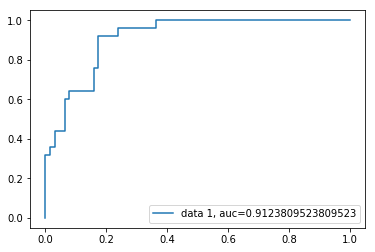

In [254]:
fpr, tpr, _ = roc_curve(y_test,  pred_probs[:, 1])
auc = roc_auc_score(y_test, pred_probs[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()